### Import libraries

In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')


### Import train and test data

In [164]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
dataset = pd.concat([train,test],ignore_index=True) #ingnoreindex:  do not use the index values along the concatenation axis. The resulting axis will be labeled 0, …, n - 1.
PassengerId = test['PassengerId'] #Retrieve Passenger ID from test set, used for submission

In [165]:
dataset = dataset.fillna(np.nan) #Check missing values

In [166]:
dataset.isnull().sum() # check null values

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [167]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [168]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [169]:
train.dtypes # check datatypes of each column

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [170]:
train.describe() #Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Data Visualization 

#### SEX Feature
female has higher survival rate than male

Percentage of females that could survive: 74.20
Percentage of females that could survive: 18.89


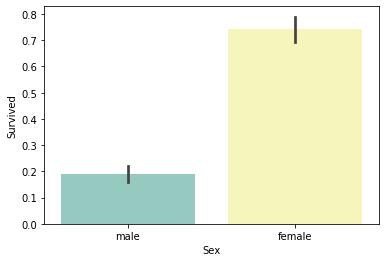

In [171]:
sns.barplot(x="Sex", y="Survived", data=train, palette='Set3')
print("Percentage of females that could survive: %.2f" %(train['Survived'][train['Sex'] == 'female'].value_counts(normalize = True)[1]*100))
print("Percentage of females that could survive: %.2f" %(train['Survived'][train['Sex'] == 'male'].value_counts(normalize = True)[1]*100))

### Pclass Feature
The higher the class is, the high probability survive

Percentage of Pclass = 1, survived probability: 62.96
Percentage of Pclass = 2, survived probability: 47.28
Percentage of Pclass = 3, survived probability: 24.24


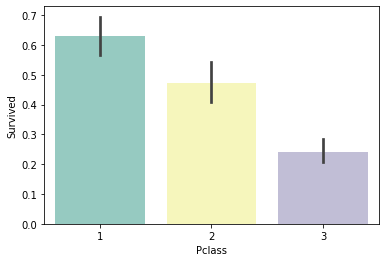

In [172]:
sns.barplot(x='Pclass', y='Survived', data=train, palette='Set3')
print("Percentage of Pclass = 1, survived probability: %.2f" %(train['Survived'][train['Pclass']==1].value_counts(normalize = True)[1]*100))
print("Percentage of Pclass = 2, survived probability: %.2f" %(train['Survived'][train['Pclass']==2].value_counts(normalize = True)[1]*100))
print("Percentage of Pclass = 3, survived probability: %.2f" %(train['Survived'][train['Pclass']==3].value_counts(normalize = True)[1]*100))

### SibSp Feature
With a suitable number of siblings and spouse, he/she will have a high survival rate.

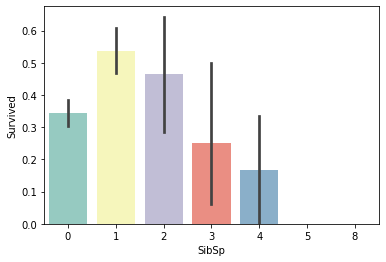

In [173]:
sns.barplot(x="SibSp", y="Survived", data=train, palette='Set3')

Like this we can do for all the features

### Fill the missing values

Age feature

In [174]:
age = dataset[['Age','Pclass','Sex']]
age = pd.get_dummies(age) # Converts sex into sex_male and sex_female
#age

In [175]:
known_age = age[age.Age.notnull()].as_matrix() # all Age having valid values & as_matrix to represent it in matrix form
null_age = age[age.Age.isnull()].as_matrix()
#known_age
#null_age

In [176]:
x = known_age[:,1:]
y = known_age[:,0]
#x
#y

In [177]:
rf = RandomForestRegressor(n_jobs=-1)
rf.fit(x,y)
predictedAge = rf.predict(null_age[:,1:])
#dataset.loc[(dataset.Age.isnull()),'Age'] = predictedAge

Embarked Feature



In [178]:
dataset[dataset['Embarked'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,113572
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,113572


In [179]:
C = dataset[(dataset['Embarked']=='C') & (dataset['Pclass']==1)]['Fare'].median()
S = dataset[(dataset['Embarked']=='S') & (dataset['Pclass']==1)]['Fare'].median()
S = dataset[(dataset['Embarked']=='Q') & (dataset['Pclass']==1)]['Fare'].median()
#print(C)
#print(S)
#print(Q)
dataset['Embarked'] = dataset['Embarked'].fillna('C')
#dataset['Embarked']

Fare Feature

In [180]:
dataset[dataset['Fare'].isnull()]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,3701


In [181]:
fare = dataset[(dataset['Embarked']=="S") & (dataset['Pclass']==3)].Fare.median()
dataset['Fare']=dataset['Fare'].fillna(fare)

Retrieve surname of passenger, classify surnames into same groups


In [182]:
dataset['Surname'] = dataset['Name'].apply(lambda x:x.split(',')[0].strip()) #Get surnames of each name
#dataset['Surname']
Surname_Count = dict(dataset['Surname'].value_counts()) #Count of each type of surname
#Surname_Count
dataset['FamilyGroup'] = dataset['Surname'].apply(lambda x:Surname_Count[x])
#dataset['FamilyGroup']

Retrieve the no. of female, child and male from the goups that have more than one person

In [183]:
Female_Child_Group=dataset.loc[(dataset['FamilyGroup']>=2) & ((dataset['Age']<=12) | (dataset['Sex']=='female'))]
Male_Adult_Group=dataset.loc[(dataset['FamilyGroup']>=2) & (dataset['Age']>12) & (dataset['Sex']=='male')]
Female_Child_Group

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,FamilyGroup
1,38.00,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,Cumings,2
3,35.00,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,Futrelle,2
7,2.00,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,Palsson,5
8,27.00,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,Johnson,6
9,14.00,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,Nasser,2
10,4.00,G6,S,16.7000,"Sandstrom, Miss. Marguerite Rut",1,11,3,female,1,1.0,PP 9549,Sandstrom,3
11,58.00,C103,S,26.5500,"Bonnell, Miss. Elizabeth",0,12,1,female,0,1.0,113783,Bonnell,2
16,2.00,NaN,Q,29.1250,"Rice, Master. Eugene",1,17,3,male,4,0.0,382652,Rice,6
18,31.00,NaN,S,18.0000,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",0,19,3,female,1,0.0,345763,Vander Planke,4
22,15.00,NaN,Q,8.0292,"McGowan, Miss. Anna ""Annie""",0,23,3,female,0,1.0,330923,McGowan,2


women and children have high survival rate, while men have lower survival rate.
We set a dead group that women and children group have 0 survival rate. And set survived group for the men's group whose survival rate is 1.

In [184]:
Female_Child_Group=Female_Child_Group.groupby('Surname')['Survived'].mean()
Dead_List=set(Female_Child_Group[Female_Child_Group.apply(lambda x:x==0)].index)
#print(Dead_List)
Male_Adult_List=Male_Adult_Group.groupby('Surname')['Survived'].mean()
Survived_List=set(Male_Adult_List[Male_Adult_List.apply(lambda x:x==1)].index)
#print(Survived_List)

In order to classify the samples in these two outliers groups, modigy the Age, Title and Sex of the samples in these two groups.

In [185]:
train=dataset.loc[dataset['Survived'].notnull()]

In [186]:
test=dataset.loc[dataset['Survived'].isnull()]

In [187]:
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Sex'] = 'male'
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Age'] = 60
test.loc[(test['Surname'].apply(lambda x:x in Dead_List)),'Title'] = 'Mr'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Sex'] = 'female'
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Age'] = 5
test.loc[(test['Surname'].apply(lambda x:x in Survived_List)),'Title'] = 'Miss'

test


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,FamilyGroup,Title
891,34.5,NaN,Q,7.8292,"Kelly, Mr. James",0,892,3,male,0,NaN,330911,Kelly,5,NaN
892,47.0,NaN,S,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,3,female,1,NaN,363272,Wilkes,1,NaN
893,62.0,NaN,Q,9.6875,"Myles, Mr. Thomas Francis",0,894,2,male,0,NaN,240276,Myles,1,NaN
894,27.0,NaN,S,8.6625,"Wirz, Mr. Albert",0,895,3,male,0,NaN,315154,Wirz,1,NaN
895,22.0,NaN,S,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,3,female,1,NaN,3101298,Hirvonen,2,NaN
896,14.0,NaN,S,9.2250,"Svensson, Mr. Johan Cervin",0,897,3,male,0,NaN,7538,Svensson,3,NaN
897,30.0,NaN,Q,7.6292,"Connolly, Miss. Kate",0,898,3,female,0,NaN,330972,Connolly,2,NaN
898,26.0,NaN,S,29.0000,"Caldwell, Mr. Albert Francis",1,899,2,male,1,NaN,248738,Caldwell,3,NaN
899,18.0,NaN,C,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,3,female,0,NaN,2657,Abrahim,1,NaN
900,21.0,NaN,S,24.1500,"Davies, Mr. John Samuel",0,901,3,male,2,NaN,A/4 48871,Davies,7,NaN


Select Survived, Pclass, Sex, Age, Fare, Embarked, Title, FamilyLabel, Deck and TicketGroup as features and transfer the features into numerial values.

In [188]:
dataset = pd.concat([train, test])
dataset=dataset[['Survived','Pclass','Sex','Age','Fare','Embarked','Title']]
dataset=pd.get_dummies(dataset)

In [192]:
trainset=dataset[dataset['Survived'].notnull()]
testset=dataset[dataset['Survived'].isnull()].drop('Survived',axis=1)
X = trainset.as_matrix()[:,1:]
Y = trainset.as_matrix()[:,0]

### Model Training

Use grid search to find the best parameter of random forest classifier.

pipe=Pipeline([('select',SelectKBest(k=20)), 
               ('classify', RandomForestClassifier(random_state = 10, max_features = 'sqrt'))])

param_test = {'classify__n_estimators':list(range(20,50,2)), 
              'classify__max_depth':list(range(3,60,3))}
gsearch = GridSearchCV(estimator = pipe, param_grid = param_test, scoring='accuracy', cv=10)
gsearch.fit(X,Y)
print(gsearch.best_params_, gsearch.best_score_)

select = SelectKBest(k = 20)
clf = RandomForestClassifier(random_state = 10, warm_start = True, 
                                  n_estimators = 26,
                                  max_depth = 6, 
                                  max_features = 'sqrt')
pipeline = make_pipeline(select, clf)
pipeline.fit(X, Y)

### Cross Validation

cv_score = model_selection.cross_val_score(pipeline, X, Y, cv= 10)
print("CV Score : Mean - %.7g | Std - %.7g " % (np.mean(cv_score), np.std(cv_score)))

### Submission

predictions = pipeline.predict(testset)
submission = pd.DataFrame({"PassengerId": PassengerId, "Survived": predictions.astype(np.int32)})
submission.to_csv("submission.csv", index=False)